<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
       DemAffl  DemAge  DemCluster  PromSpend  PromTime
0         10.0    76.0        16.0   16000.00       4.0
1          4.0    49.0        35.0    6000.00       5.0
2          5.0    70.0        27.0       0.02       8.0
3         10.0    65.0        51.0       0.01       7.0
4         11.0

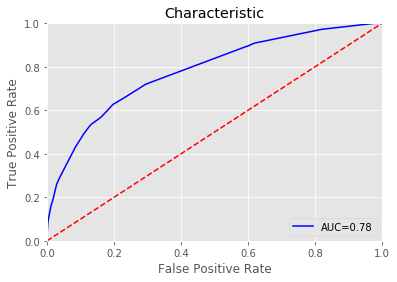

In [25]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metric
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df=pd.read_csv('/Users/remir/Desktop/DATA-ANALYSYS_2-master/Dataset/ORGANICS.csv',encoding="cp1251")

df.info()
df = df.fillna(df.median(axis=0), axis=0)

x = df[[c for c in df.columns if df[c].dtype.name != 'object' and c !="ID"and c !="TargetBuy" and c != "TargetAmt" ]]
print(x)
y = df.values[::,11]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_test = y_test.astype(int)
y_train = y_train.astype(int)

tree = DecisionTreeClassifier(max_depth=5, criterion = "entropy", random_state=0)
tree.fit(X_train, y_train)

cm = metrics.confusion_matrix(y_test, tree.predict(X_test))

print(cm[0][0])
print(cm[1][0])
print(cm[1][1])
print(cm[0][1]) 

preds = tree.predict(X_test) 

print(metric.accuracy_score(y_test, preds))
print(metric.recall_score(y_test, preds))
print(metric.precision_score(y_test, preds))
print(metric.f1_score(y_test, preds))
print(metric.balanced_accuracy_score(y_test, preds))
print(metric.matthews_corrcoef(y_test, preds))
print(metric.cohen_kappa_score(y_test, preds))


pred_prob = tree.predict_proba(X_test)
preds = pred_prob[:, -1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metric.auc(fpr, tpr)

plt.title('Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC=%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()